In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls '/content/drive/My Drive/Eventlog/'


ls: cannot access '/content/drive/My Drive/Eventlog/': No such file or directory


In [0]:
!pip install pm4py

In [0]:
#Importing library to read log file
from pm4py.objects.log.importer.xes import factory as xes_import_factory

import pandas as pd


## loading xes file and reading the file

In [0]:
#File path
filename = '/content/drive/My Drive/Eventlog/Examplebadjulian.xes'

log = xes_import_factory.apply(filename)

## converting xes to csv and reading the file using pandas

In [0]:
from pm4py.objects.log.exporter.csv import factory as csv_exporter

csv_exporter.export(log, "/content/drive/My Drive/Eventlog/Example_xes_csv.csv")

In [0]:
filename =  "/content/drive/My Drive/Eventlog/Example_xes_csv.csv"
df = pd.read_csv(filename)

In [8]:
df.head()

case:concept:name  ...             time:timestamp
0                 88  ...  2013-03-17 17:56:00-05:00
1                 88  ...  2013-03-18 17:56:00-05:00
2                 88  ...  2013-03-19 17:56:00-05:00
3                 88  ...  2013-03-20 17:56:00-05:00
4                 88  ...  2013-03-21 17:56:00-05:00

[5 rows x 4 columns]

## Function to convert single event to combined event

In [0]:
def modify_data(df_eve,unique_id):
  
  case_id = []
  activity_id = []
  complete_time_stamp = []
  lifecycle_transition = []

  for i in range(1,len(unique_id)+1):
  
    row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
    row_filter  = row_filter.reset_index(drop=True)
  
    for n in range(len(row_filter)):
      case_id.append(row_filter.loc[row_filter['case:concept:name']==i,'case:concept:name'][n])
    
    case_id.append(row_filter.loc[row_filter['case:concept:name']==i,'case:concept:name'][n])
  
  
  
  for i in range(1,len(unique_id)+1):
  
    row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
    row_filter  = row_filter.reset_index(drop=True)
    
    for n in range(len(row_filter)):
      complete_time_stamp.append(row_filter.loc[row_filter['case:concept:name']==i,'time:timestamp'][n])
    
    complete_time_stamp.append(row_filter.loc[row_filter['case:concept:name']==i,'time:timestamp'][n])
    
    
  for i in range(1,len(unique_id)+1):
  
    row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
    row_filter  = row_filter.reset_index(drop=True)
    
    for n in range(len(row_filter)):
      lifecycle_transition .append(row_filter.loc[row_filter['case:concept:name']==i,'lifecycle:transition'][n])
    
    lifecycle_transition.append(row_filter.loc[row_filter['case:concept:name']==i,'lifecycle:transition'][n])
    
  
  for i in range(1,len(unique_id)+1):
  
    row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
    row_filter  = row_filter.reset_index(drop=True)
  
    activity_id.append('start')
    for n in range(len(row_filter)-1):
      activity_id.append(row_filter.loc[row_filter['case:concept:name']==i,'concept:name'][n]+row_filter.loc[row_filter['case:concept:name']==i,'concept:name'][n+1])
    
    activity_id.append('end')
  
  
  dic_data = {'case:concept:name':case_id,'concept:name':activity_id,'lifecycle:transition':lifecycle_transition,'time:timestamp':complete_time_stamp, }
  df_modified = pd.DataFrame(dic_data)
  
  return df_modified

In [0]:
unique_id = df["case:concept:name"].unique()
modified_csv = modify_data(df,unique_id)

In [11]:
modified_csv.iloc[70:77,1]

70    start
71       ab
72       bc
73       cf
74       fg
75       gh
76      end
Name: concept:name, dtype: object

In [0]:
modified_csv.to_csv('/content/drive/My Drive/apps/Maryam/Eventlog//modified.csv',index=True)

# Exploring  PNML file

In [12]:
import os
from pm4py.objects.petri.importer import pnml as pnml_importer

filename = '/content/drive/My Drive/Eventlog/Examplejulianchanges.pnml'

net, initial_marking, final_marking = pnml_importer.import_net(filename)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated function import_net.
  


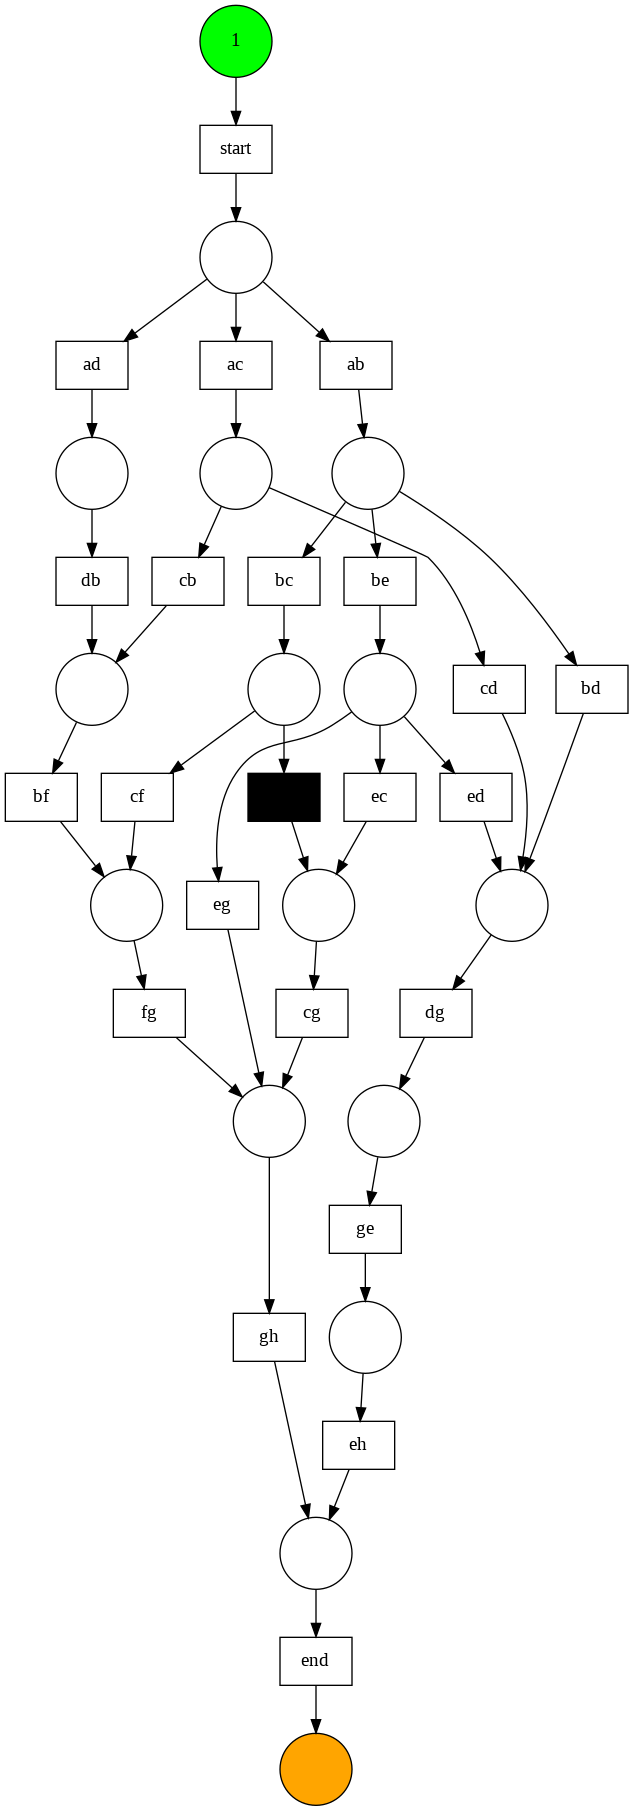

In [13]:
from pm4py.visualization.petrinet import factory as pn_vis_factory

gviz = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz)

In [0]:
from pm4py.objects.petri import semantics

transitions = semantics.enabled_transitions(net, initial_marking)

In [0]:
place = net.places
transitions = net.transitions
arc = net.arcs

In [14]:
arc

{(p)n1->(t)cb,
 (p)n1->(t)cd,
 (p)n10->(t)ab,
 (p)n10->(t)ac,
 (p)n10->(t)ad,
 (p)n11->(t)cg,
 (p)n12->(t)ge,
 (p)n13->(t)db,
 (p)n14->(t)eh,
 (p)n15->(t)start,
 (p)n2->(t)bf,
 (p)n3->(t)end,
 (p)n4->(t)bc,
 (p)n4->(t)bd,
 (p)n4->(t)be,
 (p)n5->(t)dg,
 (p)n6->(t)fg,
 (p)n7->(t)ec,
 (p)n7->(t)ed,
 (p)n7->(t)eg,
 (p)n8->(t)gh,
 (p)n9->(t)cf,
 (p)n9->(t)n39,
 (t)ab->(p)n4,
 (t)ac->(p)n1,
 (t)ad->(p)n13,
 (t)bc->(p)n9,
 (t)bd->(p)n5,
 (t)be->(p)n7,
 (t)bf->(p)n6,
 (t)cb->(p)n2,
 (t)cd->(p)n5,
 (t)cf->(p)n6,
 (t)cg->(p)n8,
 (t)db->(p)n2,
 (t)dg->(p)n12,
 (t)ec->(p)n11,
 (t)ed->(p)n5,
 (t)eg->(p)n8,
 (t)eh->(p)n3,
 (t)end->(p)n16,
 (t)fg->(p)n8,
 (t)ge->(p)n14,
 (t)gh->(p)n3,
 (t)n39->(p)n11,
 (t)start->(p)n10}

## Token replay

In [0]:
# This functions gives places which goes to transitions


def trans_in(trans_inputs):
  import re
  trainsition_input = []
  place_out = []
  arc_s = str(trans_inputs)
  arc_clean = re.sub('[^A-Za-z0-9,->]+', '', arc_s)
  arc_f = arc_clean.split(",")
  
  for i in range(len(arc_f)):
    arc_f[i]=arc_f[i][1:]
    arc_f[i] = arc_f[i].split("->")
    trainsition_input.append(arc_f[i][1][1:])
    place_out.append(arc_f[i][0])
    
  return place_out,trainsition_input
  

trans_inputs = []
for place in net.places:
  
  for arc in place.out_arcs:
    trans_inputs.append(arc)
        
place_output,trans_input = trans_in(trans_inputs)

In [0]:
# This function gives transitions output which goes to places

def trans_out(trans_out):
  import re
  trainsition_output = []
  place_in = []
  arc_s = str(trans_out)
  arc_clean = re.sub('[^A-Za-z0-9,->]+', '', arc_s)
  arc_f = arc_clean.split(",")
  
  for i in range(len(arc_f)):
    arc_f[i]=arc_f[i][1:]
    arc_f[i] = arc_f[i].split("->")
    trainsition_output.append(arc_f[i][0]) 
    place_in.append(arc_f[i][1][1:])
    
  return trainsition_output,place_in 
  

transitions_out = []
for trans in transitions:
#    trans_unique_name[trans.name]= trans.label
    for arc in trans.out_arcs:
        transitions_out.append(arc)
        
trans_output, place_input = trans_out(transitions_out)

In [0]:

for i  in enumerate(zip(trans_output, place_input)):
  print(i)

(0, ('eg', 'n8'))
(1, ('end', 'n16'))
(2, ('ad', 'n13'))
(3, ('ec', 'n11'))
(4, ('fg', 'n8'))
(5, ('cb', 'n2'))
(6, ('gh', 'n3'))
(7, ('eh', 'n3'))
(8, ('ed', 'n5'))
(9, ('ab', 'n4'))
(10, ('ge', 'n14'))
(11, ('n39', 'n11'))
(12, ('dg', 'n12'))
(13, ('cf', 'n6'))
(14, ('be', 'n7'))
(15, ('ac', 'n1'))
(16, ('db', 'n2'))
(17, ('bd', 'n5'))
(18, ('bc', 'n9'))
(19, ('cd', 'n5'))
(20, ('start', 'n10'))
(21, ('bf', 'n6'))
(22, ('cg', 'n8'))


In [0]:
unique_id = modified_csv['case:concept:name'].unique()


In [0]:
def fire_trans(trans, place_trans, trans_place):
  
  for i in place_trans:
    place_tokens[i] = 0
    if i not in place_p_c:
      place_p_c[i] = {}
      place_p_c[i]["c"] = 1
    else:
      place_p_c[i]["c"] = 1
         
  for i in trans_place:
    place_tokens[i] = 1
    if i not in place_p_c:
      place_p_c[i] = {}
      place_p_c[i]["p"] = 1

    else:
      place_p_c[i]["p"] = 1
       

In [0]:
place_output[trans_input.index('end')]

'n3'

In [0]:
def start_trans(trans_output,place_input,place_output,trans_input,place_p_c):

  for t , p in enumerate(zip(trans_output,place_input,place_output,trans_input)):
    if "start"  == p[0]:
      trans_place.append(p[1])
      #produce tokens
      for i in trans_place:
        place_tokens[i] = 1
        place_p_c[i] = {}
        place_p_c[i]["p"] = 1


In [0]:
def end_trans(trans_output,place_input,place_output,trans_input,place_p_c):

  for t , p in enumerate(zip(trans_output,place_input,place_output,trans_input)):
    if "end"  == p[0]:
      place_before_end = place_output[trans_input.index('end')]
      place_tokens[place_before_end ] = 0
      if i not in place_p_c:
        place_p_c[i] = {}
        place_p_c[i]["c"] = 1
      else:
        place_p_c[i]["c"] = 1

            
                


In [0]:
pcmr = {"p":0,"c":0,"m":0,"r":0}

p_pcmr = {}

for p_t in place_trans:
  p_pcmr[p_t]= pcmr 
  
for k, v in p_pcmr.items():
  if

In [0]:
# This code checks whether a incoming place has enough tokens or not


def trans_f(tran_obs,trans_output,place_input,place_output,trans_input,place_p_c):

  
  for t , p in enumerate(zip(trans_output,place_input,place_output,trans_input)):
    if tran_obs  == p[3]:
      place_trans.append(p[2])
      
    if tran_obs  == p[0]:
      trans_place.append(p[1])
         
      # Checking whether the incoming places has enough tokens or not
      for i in place_trans:

        # only one incoming is to the transitions
        if len(place_trans) ==1:
          # no token in place
          if place_tokens[i] == 0:
            place_tokens[i] = 1
            if i not in place_p_c:
              place_p_c[i] = {}
              place_p_c[i]["m"] = 1
              fire_trans(tran_obs ,place_trans,trans_place)
            else:
              place_p_c[i]["m"] = 1
              fire_trans(tran_obs ,place_trans,trans_place)

          # There is only one token   
          elif place_tokens[i] == 1:
            place_p_c[i]["m"] = 0
            fire_trans(tran_obs ,place_trans,trans_place)

          
        

              


In [33]:


file = {}  


for r in range(1,len(unique_id)+1):
  
  
  # Store p, c , m, and r value of each place   
  trace_pcmr = {}
  # Store p ,c and m value of each place
  place_p_c = {}
  
  #empty tokens
  place_tokens = {}

  for place in net.places:
      place_tokens[place.name] = 0
      
  # Find number of hidden transition   
  hidden_trans = []
  for i in range(len(trans_output)):
    if 'n' == trans_output[i][0]:
      hidden_trans.append(trans_output[i])
    
  row_filter = modified_csv.loc[modified_csv['case:concept:name']==r,:]
  row_filter  = row_filter.reset_index(drop=True)

  # for loop for one trace
  for n in range(len(row_filter)):
     # To store transition output to place input
      trans_place= []
      # To store place output to transition input
      place_trans = []
          
      # event
      tran_obs = row_filter.loc[row_filter['case:concept:name']==r,'concept:name'][n]
      print(tran_obs)

      
      if tran_obs == "start":
        start_trans(trans_output,place_input,place_output,trans_input,place_p_c)
        #print("{}".format(place_p_c ))
        
      elif tran_obs == "end":
        
        end_trans(trans_output,place_input,place_output,trans_input,place_p_c)
        
      else :
        trans_f(tran_obs,trans_output,place_input,place_output,trans_input,place_p_c)
        #print("{} ".format(tplace_p_c_t))
      
      
      
  for place, value in place_tokens.items():
    if value > 0:
      if place not in place_p_c:
        place_p_c[place] = {}
        place_p_c[place]['r'] = value
      else:
        place_p_c[place]['r'] = value
    else:
      if place not in place_p_c:
        place_p_c[place] = {}
        place_p_c[place]['r'] = 0
      else:
        place_p_c[place]['r'] = 0
      
       
  print(place_p_c)
  for k, v in place_p_c.items():
    for ik in v.keys():
      if ik not in trace_pcmr:
        trace_pcmr[ik] = v[ik]
      else :
        trace_pcmr[ik] += v[ik]

  
  file[r]=trace_pcmr




start
ab
bc
cg
ge
eh
end
{'n10': {'p': 1, 'm': 0, 'c': 1, 'r': 0}, 'n4': {'p': 1, 'm': 0, 'c': 1, 'r': 0}, 'n9': {'p': 1, 'r': 1}, 22: {'c': 1}, 'n13': {'r': 0}, 'n7': {'r': 0}, 'n5': {'r': 0}, 'n14': {'r': 0}, 'n3': {'r': 0}, 'n6': {'r': 0}, 'n1': {'r': 0}, 'n11': {'r': 0}, 'n15': {'r': 0}, 'n2': {'r': 0}, 'n16': {'r': 0}, 'n12': {'r': 0}, 'n8': {'r': 0}}
start
ab
bc
cg
ge
eh
end
{'n10': {'p': 1, 'm': 0, 'c': 1, 'r': 0}, 'n4': {'p': 1, 'm': 0, 'c': 1, 'r': 0}, 'n9': {'p': 1, 'r': 1}, 22: {'c': 1}, 'n13': {'r': 0}, 'n7': {'r': 0}, 'n5': {'r': 0}, 'n14': {'r': 0}, 'n3': {'r': 0}, 'n6': {'r': 0}, 'n1': {'r': 0}, 'n11': {'r': 0}, 'n15': {'r': 0}, 'n2': {'r': 0}, 'n16': {'r': 0}, 'n12': {'r': 0}, 'n8': {'r': 0}}
start
ab
bc
cg
ge
eh
end
{'n10': {'p': 1, 'm': 0, 'c': 1, 'r': 0}, 'n4': {'p': 1, 'm': 0, 'c': 1, 'r': 0}, 'n9': {'p': 1, 'r': 1}, 22: {'c': 1}, 'n13': {'r': 0}, 'n7': {'r': 0}, 'n5': {'r': 0}, 'n14': {'r': 0}, 'n3': {'r': 0}, 'n6': {'r': 0}, 'n1': {'r': 0}, 'n11': {'r': 0}, 'n15':

In [0]:
file

{1: {'c': 6, 'm': 4, 'p': 4, 'r': 3}}

In [31]:
file[11]

{'c': 6, 'm': 3, 'p': 3, 'r': 0}

# Computing Fitnes 

In [0]:

def fitness(file):
  
  sum_of_c = 0
  sum_of_m = 0
  sum_of_r = 0
  sum_of_p = 0
  
  trace = {}
  
  for k, v in file.items():
    if k not in trace:
      trace[k] = {'c':0,'m':0,'p':0,'r':0}
      
      for ik, iv in trace[k].items():
        if ik == 'c' :
          trace[k][ik] = file[k][ik]  
        elif ik == 'm':
          trace[k][ik] = file[k][ik]
        elif ik == 'p':
          trace[k][ik] = file[k][ik] 
        else :
          trace[k][ik] = file[k][ik]
 
  
  for k, v in trace.items():

    for ik, iv in v.items():
      if ik == 'c' :
        sum_of_c += v[ik]
      elif ik == 'm':
        sum_of_m += v[ik]
      elif ik == 'p':
        sum_of_p += v[ik]
      else :
        sum_of_r += v[ik]
        
  fitness = 1/2 * (1-sum_of_m/sum_of_c) + 1/2 *(1-sum_of_r/sum_of_p)
  
  result = '%.2f' % fitness + ' %'
        
  return result
 
  
result = fitness(file)
result

'0.40 %'

In [0]:
# This code checks whether a incoming place has enough tokens or not


def trans_c(tran_obs,trans_output,place_input,place_output,trans_input,place_p_c,hidden_trans):
  
  g_variable = 1
  
  for t , p in enumerate(zip(trans_output,place_input,place_output,trans_input)):
    if tran_obs  == p[0]:
      trans_place.append(p[1])
      
    if tran_obs  == p[3]:
      place_trans.append(p[2])
      
      
   
    # Checking whether the incoming places has enough tokens or not
    for i in place_trans:
      # only one incoming is to the transitions
      if len(place_trans) ==1:
        
        if place_tokens[i] == 1:
          place_p_c[i]["m"] = 0
          fire_trans(tran_obs ,place_trans,trans_place)
          g_variable = 0
          break 
          
        elif place_tokens[i] == 0:
          print(i )
          print( place_tokens[i] )
          place_tokens[i] = 1
          if i not in place_p_c:
            place_p_c[i] = {}
            place_p_c[i]["m"] = 1
            fire_trans(tran_obs ,place_trans,trans_place)
          else:
            place_p_c[i]["m"] = 1
            fire_trans(tran_obs ,place_trans,trans_place)
            
    g_variable  = 0
    break 

          
          
    """
          
          # IF a hidden transition is available, fire it 
          if tran_obs  in hidden_trans:
            fire_trans(tran_obs ,place_trans,trans_place)
          else:
            
            place_tokens[i] = 1
            
            if i not in place_p_c:
              place_p_c[i] = {}
              #place_p_c[i]["m"] = 1
              fire_trans(tran_obs ,place_trans,trans_place)
                   
            else:
              #place_p_c[i]["m"] = 1
              fire_trans(tran_obs ,place_trans,trans_place) """
              
  return tran_obs,trans_output,place_input,place_output,trans_input,place_p_c,hidden_trans

                  
                  

       
  
        